##### Dataset: https://www.kaggle.com/c/fake-news/data#

In [230]:
import pandas as pd

In [231]:
import io
%cd "C:\Users\INTEL\Desktop\Practice datasets\Fake News Classifier - NLP\fake-news"

C:\Users\INTEL\Desktop\Practice datasets\Fake News Classifier - NLP\fake-news


In [232]:
data=pd.read_csv("train.csv")

In [233]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [234]:
data.shape

(20800, 5)

In [235]:
data.dropna(inplace=True)

In [236]:
data=data.reset_index()

In [237]:
data.head()

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [238]:
messages=data.drop(['index','id','label'],1)

In [239]:
messages.shape

(18285, 3)

In [240]:
messages.head()

,title,author,text
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [241]:
import re
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import textblob
from textblob import TextBlob
import numpy as np

In [242]:
lemmatizer=WordNetLemmatizer()
stwords=stopwords.words('english')

In [243]:
messages['title'][15]

'Anonymous Donor Pays $2.5 Million To Release Everyone Arrested At The Dakota Access Pipeline'

In [244]:
re.sub('[^a-zA-Z]',' ',messages['title'][15]).lower().split()

['anonymous',
 'donor',
 'pays',
 'million',
 'to',
 'release',
 'everyone',
 'arrested',
 'at',
 'the',
 'dakota',
 'access',
 'pipeline']

In [245]:
def text_preprocessing(dt):
    corpus=[]
    for i in range(len(dt)):
        review=re.sub('[^a-zA-Z]',' ',dt[i])
        review=review.lower().split()
        review=[lemmatizer.lemmatize(word) for word in review if word not in stwords]
        corpus.append(' '.join(review))
    return corpus

In [246]:
def analyze_sentiment(text):
    analysis=TextBlob(text)
    if analysis.sentiment.polarity>0:
        return 'Positive'
    elif analysis.sentiment.polarity==0:
        return 'Neutral'
    else:
        return 'Negative'

In [247]:
clean_text=text_preprocessing(messages['title'])

In [248]:
clean_text[:10]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart',
 'truth might get fired',
 'civilian killed single u airstrike identified',
 'iranian woman jailed fictional unpublished story woman stoned death adultery',
 'jackie mason hollywood would love trump bombed north korea lack trans bathroom exclusive video breitbart',
 'beno hamon win french socialist party presidential nomination new york time',
 'back channel plan ukraine russia courtesy trump associate new york time',
 'obama organizing action partner soros linked indivisible disrupt trump agenda',
 'bbc comedy sketch real housewife isi cause outrage']

In [249]:
sentiment_analysis=pd.DataFrame(clean_text,columns=['text'])
sentiment_analysis['sentiment']=0

In [250]:
for i in range(len(clean_text)):
    sentiment_analysis['sentiment'].iloc[i]=analyze_sentiment(clean_text[i])

C:\Users\INTEL\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [251]:
sentiment_analysis.head(10)

,text,sentiment
0,house dem aide even see comey letter jason cha...,Neutral
1,flynn hillary clinton big woman campus breitbart,Neutral
2,truth might get fired,Neutral
3,civilian killed single u airstrike identified,Negative
4,iranian woman jailed fictional unpublished sto...,Neutral
5,jackie mason hollywood would love trump bombed...,Positive
6,beno hamon win french socialist party presiden...,Positive
7,back channel plan ukraine russia courtesy trum...,Positive
8,obama organizing action partner soros linked i...,Positive
9,bbc comedy sketch real housewife isi cause out...,Positive


In [252]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [253]:
cv=CountVectorizer(max_features=10000,ngram_range=(1,3))
CountVectorizer()

CountVectorizer()

In [254]:
X=cv.fit_transform(clean_text).toarray()

In [255]:
y=data.label

In [256]:
cv.get_feature_names()[:10]

['aaron',
 'ab',
 'abandon',
 'abandoned',
 'abbas',
 'abc',
 'abc news',
 'abduction',
 'abduction ring',
 'abduction ring exposed']

In [264]:
cv.vocabulary_

{'house': 4124,
 'dem': 2291,
 'aide': 194,
 'even': 2948,
 'see': 7707,
 'comey': 1729,
 'letter': 4936,
 'jason': 4497,
 'chaffetz': 1362,
 'comey letter': 1737,
 'jason chaffetz': 4498,
 'flynn': 3353,
 'hillary': 3984,
 'clinton': 1571,
 'big': 835,
 'woman': 9841,
 'campus': 1232,
 'breitbart': 1049,
 'hillary clinton': 3988,
 'campus breitbart': 1233,
 'truth': 9174,
 'might': 5426,
 'get': 3603,
 'fired': 3274,
 'civilian': 1517,
 'killed': 4688,
 'single': 7954,
 'airstrike': 212,
 'identified': 4199,
 'civilian killed': 1518,
 'iranian': 4431,
 'jailed': 4479,
 'fictional': 3222,
 'story': 8300,
 'death': 2210,
 'jackie': 4475,
 'mason': 5260,
 'hollywood': 4066,
 'would': 9906,
 'love': 5084,
 'trump': 8950,
 'bombed': 962,
 'north': 5898,
 'korea': 4731,
 'lack': 4768,
 'trans': 8883,
 'bathroom': 720,
 'exclusive': 2978,
 'video': 9422,
 'jackie mason': 4476,
 'would love': 9910,
 'north korea': 5901,
 'exclusive video': 2984,
 'video breitbart': 9423,
 'win': 9801,
 'frenc

In [265]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 10000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [266]:
X=pd.DataFrame(X,columns=cv.get_feature_names())

In [267]:
X.head()

,aaron,ab,abandon,abandoned,abbas,abc,abc news,abduction,abduction ring,abduction ring exposed,...,zombie,zone,zone breitbart,zone declared,zone declared militarized,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [268]:
X.shape

(18285, 10000)

In [269]:
from sklearn.model_selection import train_test_split

In [270]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

In [271]:
import matplotlib.pyplot as plt

In [272]:
from sklearn.naive_bayes import MultinomialNB

In [273]:
nb=MultinomialNB()

In [274]:
nbmodel=nb.fit(x_train,y_train)

In [275]:
pred=nbmodel.predict(x_test)

In [276]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

In [277]:
accuracy_score(y_test,pred)

0.9105824446267432

In [278]:
confusion_matrix(y_test,pred)

array([[1904,  146],
       [ 181, 1426]], dtype=int64)

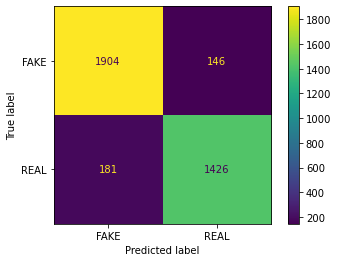

In [279]:
plot_confusion_matrix(nb,x_test,y_test,display_labels=['FAKE','REAL'])

In [280]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [281]:
PAC=PassiveAggressiveClassifier()

In [282]:
pacmodel=PAC.fit(x_train,y_train)

In [283]:
pacpred=pacmodel.predict(x_test)

In [284]:
print('Accuracy: %0.3f' %accuracy_score(pred,y_test))

Accuracy: 0.911


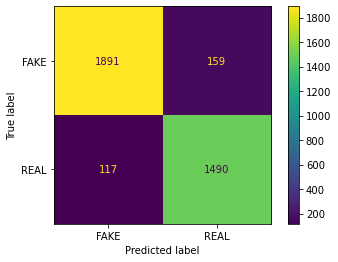

In [285]:
plot_confusion_matrix(PAC,x_test,y_test,display_labels=['FAKE','REAL'])

In [286]:
# MultinomialNB with Hyper parameter tuning
import numpy as np

In [287]:
classifier=MultinomialNB(alpha=0.1)

In [288]:
previous_score=0
for i in np.arange(0,1,0.1):
    subclassifier=MultinomialNB(alpha=i)
    subclassifier.fit(x_train,y_train)
    y_pred=subclassifier.predict(x_test)
    score=accuracy_score(y_test,y_pred)
    if score>previous_score:
        classifier=subclassifier
        previous_score=score
        print('Alpha: {}, Score: {}'.format(i,score))

C:\Users\INTEL\anaconda3\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score: 0.883237626469784
Alpha: 0.1, Score: 0.9056603773584906
Alpha: 0.2, Score: 0.9086683073557561
Alpha: 0.30000000000000004, Score: 0.9089417555373257
Alpha: 0.4, Score: 0.9097621000820345
Alpha: 0.5, Score: 0.9105824446267432
Alpha: 0.6000000000000001, Score: 0.9108558928083128


In [289]:
## Get feature names
feature_names=cv.get_feature_names()

In [290]:
classifier.coef_[0] ## the lower the value the Fake is word, the more positive cofficient the more Real is word

C:\Users\INTEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([-11.47269357, -10.00635651, -10.49186432, ..., -11.47269357,
        -9.23910135,  -9.6809341 ])

In [291]:
## Most real 
pd.DataFrame(classifier.coef_[0],index=feature_names).sort_values(ascending=False,by=0).head(10)

,0
trump,-4.094310
hillary,-4.394352
clinton,-4.474793
election,-5.074099
new,-5.321380
video,-5.442008
comment,-5.450053
war,-5.495497
fbi,-5.525529
hillary clinton,-5.534278


In [292]:
## Most Fake 
pd.DataFrame(classifier.coef_[0],index=feature_names).sort_values(ascending=True,by=0).head(10)

C:\Users\INTEL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


,0
aaron,-11.472694
obamacare repeal,-11.472694
danger new,-11.472694
danger new york,-11.472694
obamacare lite,-11.472694
obamacare exchange,-11.472694
danish,-11.472694
obamacare breitbart,-11.472694
obamacare bill,-11.472694
obamacare repeal breitbart,-11.472694


## 2. Using LSTM

In [293]:
text=messages['title']

In [294]:
import tensorflow as tf

In [295]:
from tensorflow.keras.models import Sequential
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import one_hot

In [296]:
### vocubulary size
voc_size=5000

In [297]:
x_input=text_preprocessing(messages['title'])

In [298]:
x_input[:2]

['house dem aide even see comey letter jason chaffetz tweeted',
 'flynn hillary clinton big woman campus breitbart']

In [299]:
# OneHot Representation
onehot_rep=[one_hot(sent,voc_size) for sent in x_input]
print(onehot_rep[:5])

[[2666, 4830, 4137, 4677, 3420, 1730, 253, 4722, 936, 4689], [2328, 1744, 3961, 1283, 489, 3950, 3810], [3440, 4269, 2544, 1742], [1359, 4997, 4610, 2434, 1536, 101], [3293, 489, 4870, 982, 3593, 4864, 489, 917, 3359, 1727]]


In [300]:
sent_length=0
for i in range(len(onehot_rep)):
    if len(onehot_rep[i])>sent_length:
        sent_length=len(onehot_rep[i])
print(sent_length)

47


In [301]:
# Setting a greater number to sent_length to provide padding
sent_length=50

In [302]:
# Embeddeing Representation
embedded_docs=pad_sequences(onehot_rep,padding='pre',maxlen=sent_length)
print(embedded_docs[:2])

[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0 2666 4830
  4137 4677 3420 1730  253 4722  936 4689]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0 2328 1744 3961 1283  489 3950 3810]]


In [303]:
# Creating model
embedding_vector_features=100 # no of features (groups you want to form to add similar words)
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [304]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 100)           500000    
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 580,501
Trainable params: 580,501
Non-trainable params: 0
_________________________________________________________________


In [305]:
import numpy as np

In [306]:
x_lstm=np.array(embedded_docs)
y_lstm=np.array(data.label)

In [307]:
x_lstm.shape,y_lstm.shape

((18285, 50), (18285,))

In [308]:
x_train_lstm,x_test_lstm,y_train_lstm,y_test_lstm=train_test_split(x_lstm,y_lstm,test_size=0.2,random_state=27)

In [309]:
## Model training
model.fit(x_train_lstm,y_train_lstm,validation_data=(x_test_lstm,y_test_lstm),epochs=3,batch_size=64)

Epoch 1/3
229/229 [==============================] - 25s 96ms/step - loss: 0.2770 - accuracy: 0.8808 - val_loss: 0.1888 - val_accuracy: 0.9169
Epoch 2/3
229/229 [==============================] - 23s 101ms/step - loss: 0.1308 - accuracy: 0.9504 - val_loss: 0.2094 - val_accuracy: 0.9095
Epoch 3/3
229/229 [==============================] - 24s 107ms/step - loss: 0.0869 - accuracy: 0.9692 - val_loss: 0.2128 - val_accuracy: 0.9193


In [310]:
lstm_pred=(model.predict(x_test_lstm) > 0.5).astype("int32")

In [311]:
lstm_pred[:10]

array([[1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0]])

In [312]:
confusion_matrix(y_test_lstm,lstm_pred)

array([[1879,  208],
       [  87, 1483]], dtype=int64)